## Project: Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.
The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

Metro_Is_Traffic_Vol = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

print (Metro_Is_Traffic_Vol.head())
print ()
print (Metro_Is_Traffic_Vol.tail())
print () 
print (Metro_Is_Traffic_Vol.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0  

### Analyzing Traffic Volume

(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <a list of 10 Patch objects>)

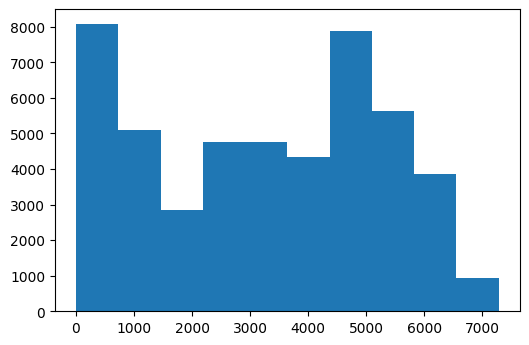

In [3]:
plt.hist(Metro_Is_Traffic_Vol['traffic_volume'])


In [4]:
Metro_Is_Traffic_Vol['traffic_volume'].describe()


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The traffic volume ranges from 0 to 7,280. The mean or average traffic volume is 3,260(rounded). The low end is about 1,193 with the top 25% being 4,933. 

Assuming this a relationsip between heavy hours of commuting traffic. ex: morning and evening rush hours. 

There is a few spikes in the chart as well. I would assume this would correlate more with non peak commute times and times where there is an unforseen event such as a car accident or inclement weather. 

### Traffic Volume: Day vs. Night

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [5]:
print (Metro_Is_Traffic_Vol['date_time'])

0        2012-10-02 09:00:00
1        2012-10-02 10:00:00
2        2012-10-02 11:00:00
3        2012-10-02 12:00:00
4        2012-10-02 13:00:00
                ...         
48199    2018-09-30 19:00:00
48200    2018-09-30 20:00:00
48201    2018-09-30 21:00:00
48202    2018-09-30 22:00:00
48203    2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: object


In [6]:
Metro_Is_Traffic_Vol['date_time'] = pd.to_datetime(Metro_Is_Traffic_Vol
                                                   ['date_time'])

print (Metro_Is_Traffic_Vol['date_time'])

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]


In [7]:
Metro_Is_Traffic_Vol['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [8]:
day_time = Metro_Is_Traffic_Vol.copy()[(Metro_Is_Traffic_Vol['date_time'].dt.hour
                                        >=7) &
                                        (Metro_Is_Traffic_Vol['date_time'].dt.hour < 19)]

print(day_time['date_time'].dt.hour)

0         9
1        10
2        11
3        12
4        13
         ..
48194    15
48195    15
48196    16
48197    17
48198    18
Name: date_time, Length: 23877, dtype: int64


In [9]:
evening_time = Metro_Is_Traffic_Vol.copy()[(Metro_Is_Traffic_Vol['date_time'].dt.hour
                                        >= 19) |
                                        (Metro_Is_Traffic_Vol['date_time'].dt.hour < 7)]

print(evening_time['date_time'].dt.hour)

10       19
11       20
12       21
13       22
14       23
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 24327, dtype: int64


### Traffic Volume: Day vs. Night (II)

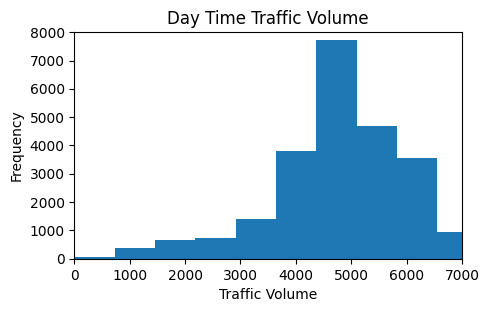

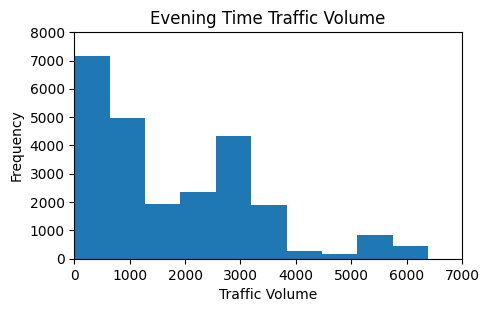

In [10]:
plt.figure(figsize = (11,3))
plt.subplot(1,2,1)
plt.hist(day_time['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Day Time Traffic Volume')
plt.xlim(0,7000)
plt.ylim(0,8000)

plt.figure(figsize = (11,3))
plt.subplot(1,2,2)
plt.hist(evening_time['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Evening Time Traffic Volume')
plt.xlim(0,7000)
plt.ylim(0,8000)
plt.show()

In [11]:
print (day_time['traffic_volume'].describe())
print ()
print (evening_time['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


According to the histograms it appears that the daytime traffic is left skewed. 
The evening traffic is skewed to the right. 

The traffic at night tends to tapper off not really going above 4,000.
Day time sees the most traffice volume. 

### Time Indicators

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

Month
Day of the week
Time of day

In [12]:
day_time['month'] = day_time['date_time'].dt.month
by_month = day_time.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Traffic Volume')

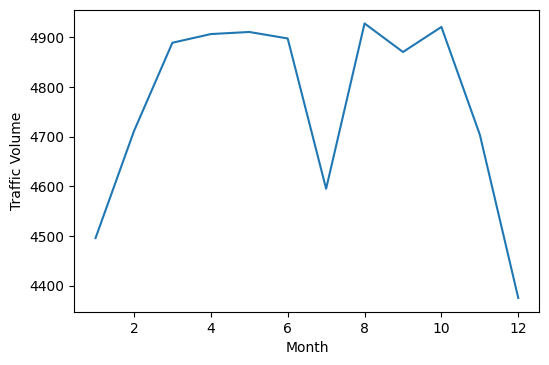

In [13]:
plt.plot(by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')

Traffic seems to increase from March to June. Falling off in July. Then increasing from August until October. 

The winter months November-February have the least amount of traffic. 

### Time Indicators (II) Day of the week

In [14]:
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek
by_dayofweek = day_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

In [15]:
print(by_dayofweek['traffic_volume'])

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


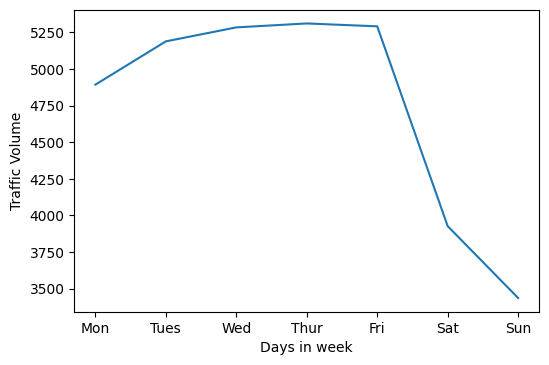

In [16]:
labels = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']

plt.plot(by_dayofweek['traffic_volume'])
plt.xlabel('Days in week')
plt.ylabel('Traffic Volume')
plt.xticks(by_dayofweek.index,labels)
plt.show()

### Time Indicators (III)

In [17]:
day_time['hour'] = day_time['date_time'].dt.hour
bussiness_days = day_time.copy()[day_time['dayofweek'] <= 4] # 4 == Friday
weekend = day_time.copy()[day_time['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print('business day', by_hour_business['traffic_volume'])
print ()
print('weekend',by_hour_weekend['traffic_volume'])


business day hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

weekend hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


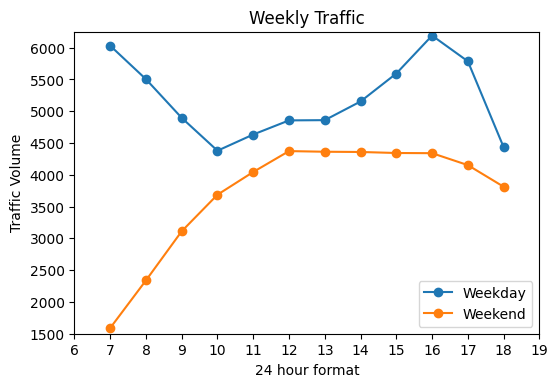

In [18]:
plt.plot(by_hour_business['traffic_volume'], marker='o', label='Weekday')
plt.xlim(6, 19)
plt.ylim(1500,6250)
plt.locator_params(axis='x', nbins=14)
plt.locator_params(axis='y', nbins=10)
plt.xlabel('24 hour format')
plt.ylabel('Traffic Volume')
plt.title("Week")

plt.plot(by_hour_weekend['traffic_volume'], marker='o',label='Weekend')
plt.xlim(6, 19)
plt.ylim(1500,6250)
plt.locator_params(axis='x', nbins=14)
plt.locator_params(axis='y', nbins=10)
plt.xlabel('24 hour format')
plt.ylabel('Traffic Volume')
plt.title("Weekly Traffic")
plt.legend()
plt.show()

According to the graph. The weekday starts with high traffic at 7am and decreases until 11am where it gradually increases
and starts to decline after 4pm. 
The rush hours for the business days tend to be at 7 am and 4pm. 

The weekdend traffic increases gradually all morning. Traffic peaks around noon to 4pm and tapers off slowly after 4pm. 
The busiest period on weekends appear to be between noon and 4pm

The weekend traffic does not surpass the lowest amount of traffic during the weekeday. 

### Weather Indicators

In [19]:
print (day_time)

      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        None  288.28     0.00      0.0          40       Clouds   
1        None  289.36     0.00      0.0          75       Clouds   
2        None  289.58     0.00      0.0          90       Clouds   
3        None  290.13     0.00      0.0          90       Clouds   
4        None  291.14     0.00      0.0          75       Clouds   
...       ...     ...      ...      ...         ...          ...   
48194    None  283.84     0.00      0.0          75         Rain   
48195    None  283.84     0.00      0.0          75      Drizzle   
48196    None  284.38     0.00      0.0          75         Rain   
48197    None  284.79     0.00      0.0          75       Clouds   
48198    None  284.20     0.25      0.0          75         Rain   

           weather_description           date_time  traffic_volume  month  \
0             scattered clouds 2012-10-02 09:00:00            5545     10   
1                broken cloud

In [20]:
day_time.loc[:,["temp","rain_1h","snow_1h","clouds_all",
           "traffic_volume"]].corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

In [21]:
day_time['temp'].describe()

count    23877.000000
mean       282.257596
std         13.298885
min          0.000000
25%        272.680000
50%        283.780000
75%        293.440000
max        310.070000
Name: temp, dtype: float64

Text(0, 0.5, 'Traffic Volume')

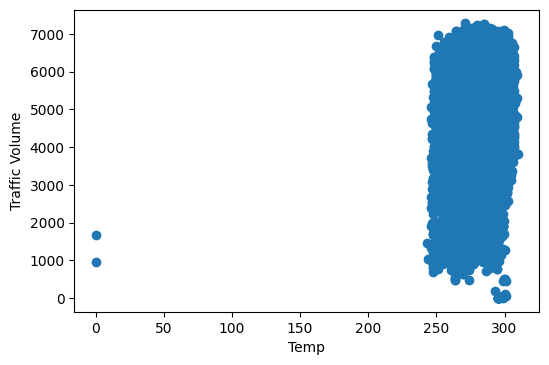

In [22]:
plt.scatter(day_time['temp'], day_time['traffic_volume'])
plt.xlabel('Temp')
plt.ylabel('Traffic Volume')

None of these columns seem to impact the traffic greatly. As we can see when I did the correlation all of the values were 
low except for temp being the highest. 

Logically it would not make sense for temperature to impact traffic volume. I used a scatter plot to show traffic is all
lumped around the same temperature range. No useful information can be gathered from this method. 

### Weather Types

In [23]:
by_weather_main = day_time.groupby('weather_main').mean()
by_weather_description = day_time.groupby('weather_description').mean()

print (by_weather_main)
print ()
print (by_weather_description)

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   
Mist          279.420825  0.249992  0.000825   74.961435     4623.976475   
Rain          287.089601  3.972943  0.000292   75.870116     4815.568462   
Smoke         292.405833  0.878333  0.000000   53.333333     4564.583333   
Snow          267.984505  0.014017  0.001768   80.501376     4396.321183   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.364678  1.146475  0.000000   75.184035     4648.212860   

           

Text(0.5, 0, 'Traffic Volume')

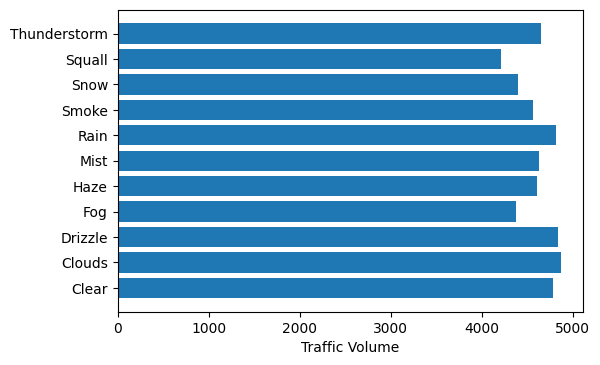

In [24]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.xlabel('Traffic Volume')

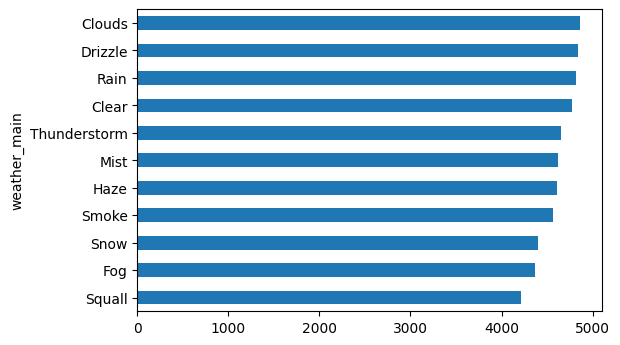

In [25]:
by_weather_main['traffic_volume'].sort_values().plot.barh()

According to weather main no weather type exceeds 5,000 in traffic volume. There is no indication of a weather type from weather main causing a substainal increase in traffic. As you can see above clear skies ranks 4th above mist and snow. 

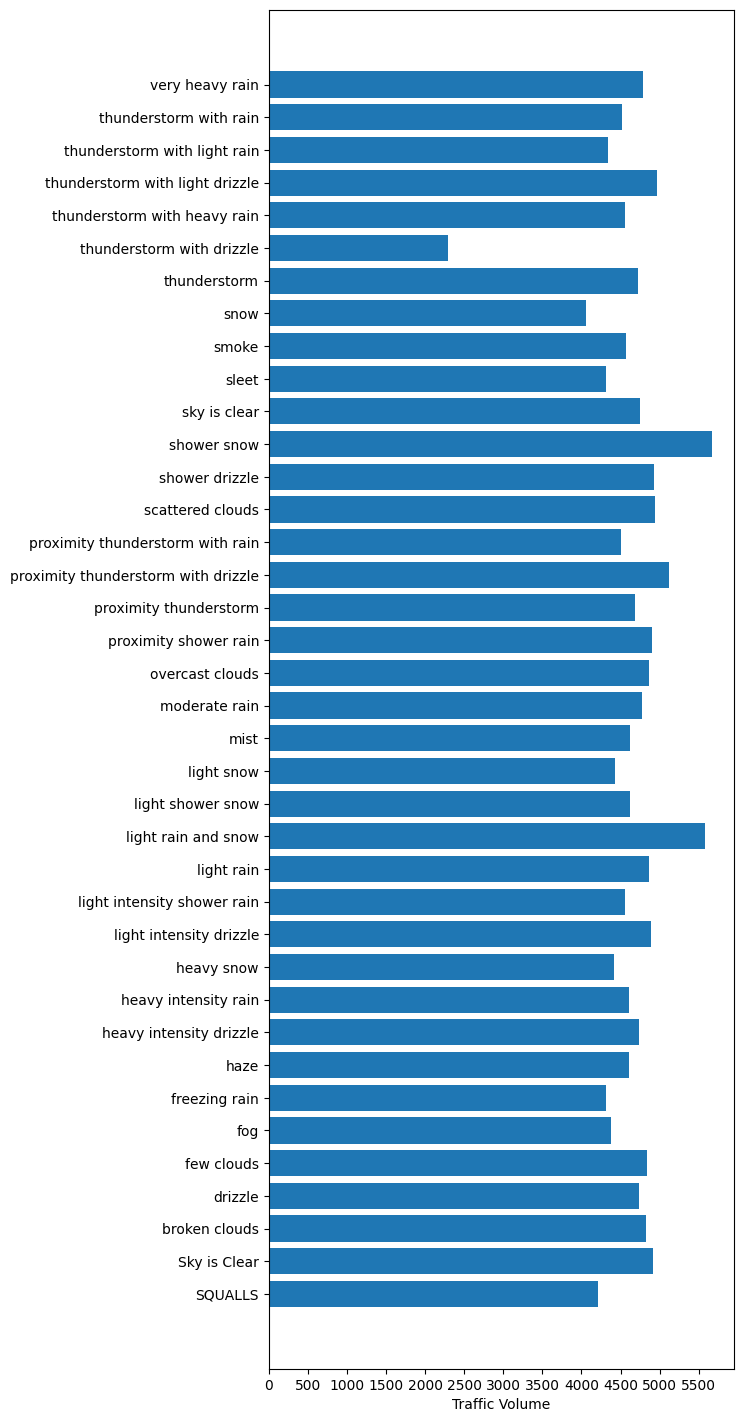

In [34]:
plt.figure(figsize=(6,18))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.locator_params(axis='x', nbins=12)
plt.show()

Traffic volume over 5,000 includes: light rain and snow, proximity thunderstorm with drizzle, and shower snow. 
Weather does not seem to impact traffic volume as one would assume. All levels from clear to heavy thunderstorms see similar 
volumes of traffic. Weather does not seem to have such a large impact with drivers. There is a better correlation with the time
of day and weekend vs weekday. 

### nighttime data to look for heavy traffic indicators.
### nighttime data to look for time and weather indicators.

In [36]:
evening_time['month'] = evening_time['date_time'].dt.month
by_month = evening_time.groupby('month').mean()
by_month['traffic_volume']

month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Traffic volume by month')

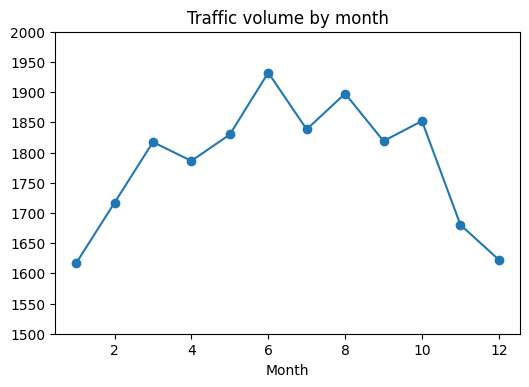

In [44]:
plt.plot(by_month['traffic_volume'], marker= 'o')
plt.ylim(1500,2000)
plt.locator_params(axis='y', nbins=12)
plt.xlabel('Month')
plt.title('Traffic volume by month')

Above we can see the peak traffic volume month is June. The summer months of June to August seems to have a higher rate of 
night traffic. 

In [46]:
evening_time['dayofweek'] = evening_time['date_time'].dt.dayofweek
by_dayofweek = evening_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    1722.532692
1    1862.926571
2    1901.465710
3    1994.177959
4    2059.882336
5    1634.459412
6    1323.998273
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Traffic volume by day')

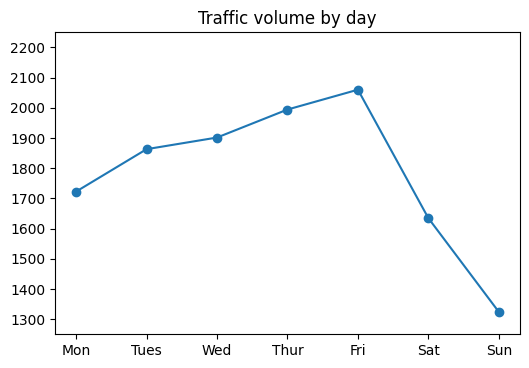

In [53]:
labels = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']

plt.plot(by_dayofweek['traffic_volume'], marker= 'o')
plt.ylim(1250,2250)
plt.locator_params(axis='y', nbins=12)
plt.xticks(by_dayofweek.index, labels)
plt.title('Traffic volume by day')

The traffic at night seems to gradually increase througout the week.
The traffic peaks on Friday night. Which is followed by a steep decline Saturday and Sunday night. 


In [62]:
evening_time['hour'] = evening_time['date_time'].dt.hour
bussiness_days = evening_time.copy()[evening_time['dayofweek'] <= 4] # 4 == Friday
weekend = evening_time.copy()[evening_time['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


print('business day', by_hour_business['traffic_volume'])
print ()
print('weekend',by_hour_weekend['traffic_volume'])


business day hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64

weekend hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


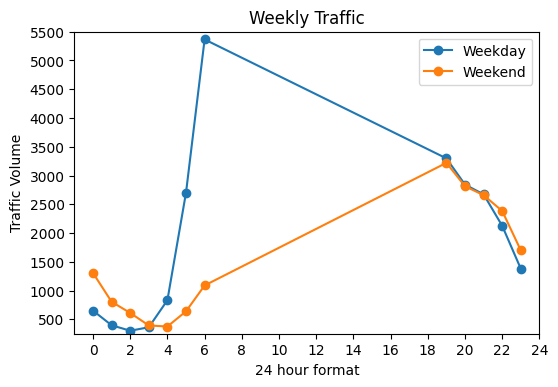

In [86]:
plt.plot(by_hour_business['traffic_volume'], marker='o', label='Weekday')
plt.xlim(-1, 24)
plt.ylim(250,5500)
plt.locator_params(axis='x', nbins=14)
plt.locator_params(axis='y', nbins=11)
plt.xlabel('24 hour format')
plt.ylabel('Traffic Volume')
plt.title("Week")

plt.plot(by_hour_weekend['traffic_volume'], marker='o',label='Weekend')
plt.xlim(-1, 24)
plt.ylim(250,5500)
plt.locator_params(axis='x', nbins=14)
plt.locator_params(axis='y', nbins=11)
plt.xlabel('24 hour format')
plt.ylabel('Traffic Volume')
plt.title("Weekly Traffic")
plt.legend()
plt.show()

The time is cut between 0 = midnight to 6am. Then it goes from 19 = 7pm to 23 = 11pm.
Viewing this graph is not perfect. The time should be split further into night and morning hours of offpeak. 

We will view it in 2 chunks. 

Midnight-6am is early morning hours on weekdays: 

From this we can tell traffic curves starting at a max of 1500. Which then decreases to below 500 until 4am. 
At 4am traffic begins to increase to a peak of over 5,000 at 6am. 

7pm-11pm on weekdays: 

Traffic starts to decline from 7pm to 11pm. 

The traffic continues to decline through the night and early morning and starts to increase again starting at 4am. 


Midnight-6am on weekends: 

From this time slot we can see traffic gradually decreases until 5am. 
From 5 am onward traffic increases. 

7pm-11pm on weekends: 

For this time slot we can see that from 7pm to 11pm the traffic consistently declines. 

For the weekend. you can that the traffic declines from 7pm all the way to 4am. At 5pm it starts to increase again. 




### Weather Indicators for night time. 

In [88]:
evening_time.loc[:,["temp","rain_1h","snow_1h","clouds_all",
           "traffic_volume"]].corr()["traffic_volume"]

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

The weather data impact is so low on evening driving. Temperatue again is the highest rating. So I will not bother graphing 
this data. Lets review the weather types. 

In [89]:
by_weather_main = evening_time.groupby('weather_main').mean()
by_weather_description = evening_time.groupby('weather_description').mean()

print (by_weather_main)
print ()
print (by_weather_description)

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         279.745734  0.000000  0.000000    1.453903     1762.057277   
Clouds        279.495731  0.000000  0.000000   65.926029     1939.232745   
Drizzle       283.173188  0.145000  0.000000   80.074627     1834.920043   
Fog           280.624182  0.036436  0.000109   42.296364     1605.365455   
Haze          276.610133  0.057700  0.000000   50.220532     1745.640684   
Mist          279.520200  0.229333  0.000652   59.000596     1626.786119   
Rain          286.869183  0.583193  0.000081   69.317909     1814.952314   
Smoke         288.710000  0.000000  0.000000   53.375000     1247.250000   
Snow          267.925211  0.036681  0.001540   82.450774     1606.324191   
Squall        290.940000  4.303333  0.000000   76.333333     1345.333333   
Thunderstorm  292.214957  1.222333  0.000000   63.356775     1727.842196   

           

Text(0.5, 0, 'Traffic Volume')

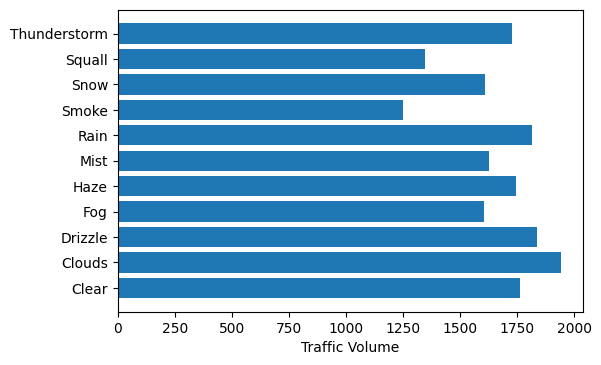

In [93]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.xlabel('Traffic Volume')

#### From the above we can see no useful information. lets break it down by description 

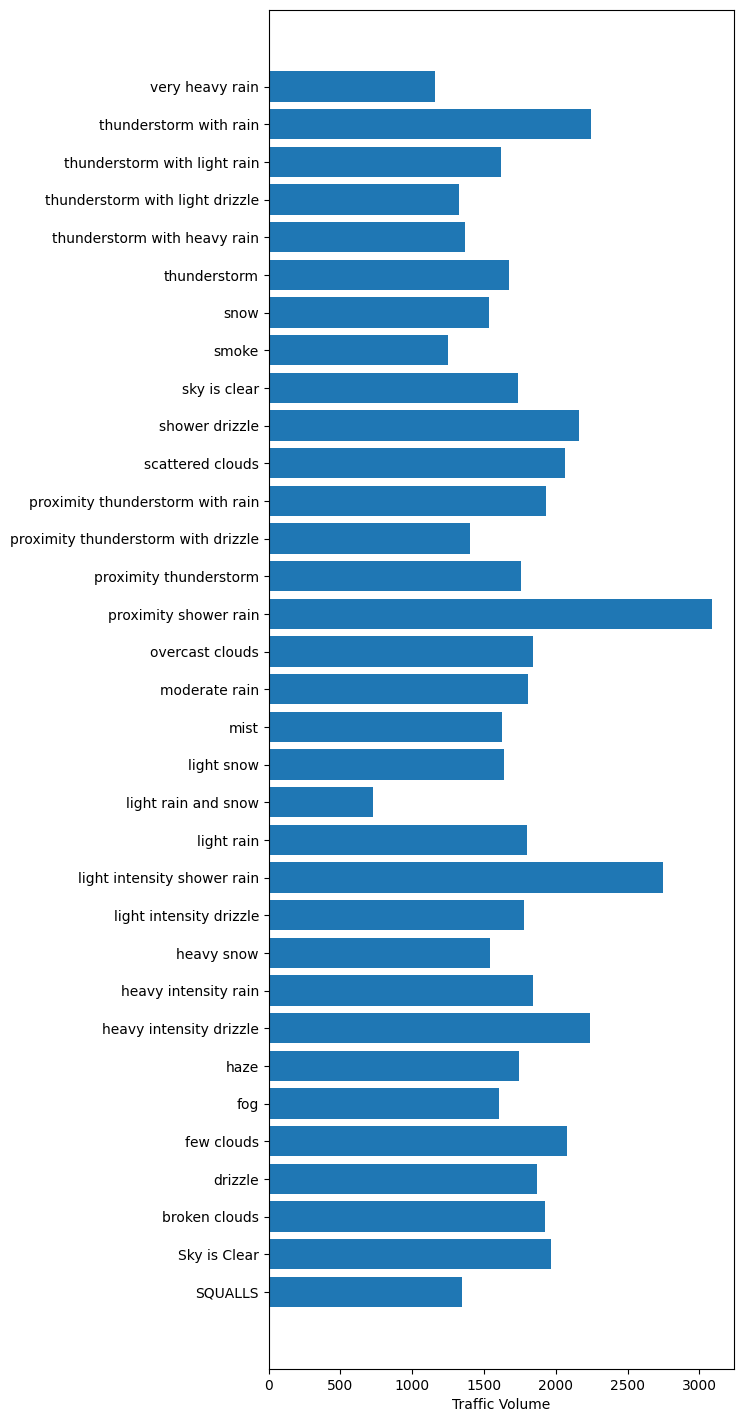

In [94]:
plt.figure(figsize=(6,18))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.locator_params(axis='x', nbins=12)
plt.show()

From the information above we can see that high intensity drizzle, light intensity shower, proximity shower, thunder storm have the highest traffic volume. 

This is probably an indication of slow down in traffic because of unexpected weather change. 
